In [ ]:
# azureml-core of version 1.0.72 or higher is required
from azureml.core import Workspace, Dataset, Datastore
subscription_id = '7ca151c5-e4f7-4663-9583-834f4e0e6ed4'
resource_group = 'calcutta_demos'
workspace_name = 'Houston-techsummit-workspace'

workspace = Workspace(subscription_id, resource_group, workspace_name)


In [91]:
#Get the yelp Datastore from adlsgen2
datastore_yelp = Datastore.get(workspace, 'yelp')

In [3]:
#Get the yelp review Parquet files produced by Synapse Analytics
dataset_yelp_review = Dataset.Tabular.from_parquet_files(path = [(datastore_yelp, \
'staging_parquet/yelp_reviews_parquet/part-00000-8b5bd625-f24e-4447-a6a7-a53712a5ad74-c000.snappy.parquet')])

# preview the first 3 rows of the dataset
dataset_yelp_review.take(3).to_pandas_dataframe()

,review_id,business_id,stars,useful,funny,cool,date,text,user_id
0,xQY8N_XvtGbearJ5X4QryQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,2015-04-15,"As someone who has worked with many museums, I...",OwjRMXRC0KyPrIlcjaXeFQ
1,UmFMZ8PyXZTY2QcwzsfQYA,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,2013-12-07,I am actually horrified this place is still in...,nIJD_7ZXHq-FX8byPMOkMQ
2,LG2ZaYiOgpr2DK_90pYjNw,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,2015-12-05,I love Deagan's. I do. I really do. The atmosp...,V34qejxNsCbcgD8C0HVk-Q


In [4]:
 dataset_yelp_review.register(workspace, 'yelp_review')

# retrieve the dataset from the workspace by name
#dataset_yelp_review = Dataset.get_by_name(workspace, 'yelp_review')
df_yelp_review = dataset_yelp_review.to_pandas_dataframe()

In [6]:
print(df_yelp_review.shape)
df_yelp_review.head()

(1009534, 9)


,review_id,business_id,stars,useful,funny,cool,date,text,user_id
0,xQY8N_XvtGbearJ5X4QryQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,2015-04-15,"As someone who has worked with many museums, I...",OwjRMXRC0KyPrIlcjaXeFQ
1,UmFMZ8PyXZTY2QcwzsfQYA,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,2013-12-07,I am actually horrified this place is still in...,nIJD_7ZXHq-FX8byPMOkMQ
2,LG2ZaYiOgpr2DK_90pYjNw,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,2015-12-05,I love Deagan's. I do. I really do. The atmosp...,V34qejxNsCbcgD8C0HVk-Q
3,i6g_oA9Yf9Y31qt0wibXpw,5JxlZaqCnk1MnbgRirs40Q,1,0,0,0,2011-05-27,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",ofKDkJKXSKZXu5xJNGiiBQ
4,6TdNDKywdbjoTkizeMce8A,IS4cv902ykd8wj1TR0N3-A,4,0,0,0,2017-01-14,"Oh happy day, finally have a Canes near my cas...",UgMW8bLE0QMJDCkQ1Ax5Mg


In [9]:
#viz
#pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

#settings
color = sns.color_palette()
sns.set_style("dark")

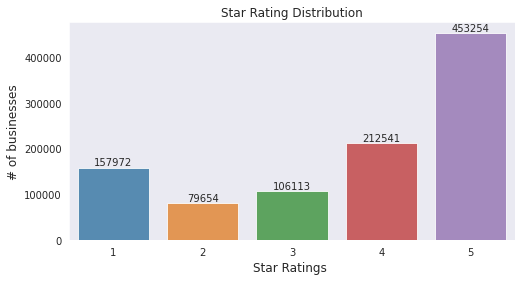

In [10]:
#Get the distribution of the ratings
x=df_yelp_review['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In this section, we classify our reviews rating into two classes of 0 (Negative for rating less than 3) 
and 1(Positive for rating >= 3) by creating new column as the "Target" for further processing.

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#pip install nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [16]:
# Create new column "Sentiment" that stored 0's or 1's. 0 being Negative, 1 being Positive
df_yelp_review["Sentiment"] = np.where(df_yelp_review["stars"] >= 3, 1, 0)
df_yelp_review.head(3)

,review_id,business_id,stars,useful,funny,cool,date,text,user_id,Sentiment
0,xQY8N_XvtGbearJ5X4QryQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,2015-04-15,"As someone who has worked with many museums, I...",OwjRMXRC0KyPrIlcjaXeFQ,0
1,UmFMZ8PyXZTY2QcwzsfQYA,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,2013-12-07,I am actually horrified this place is still in...,nIJD_7ZXHq-FX8byPMOkMQ,0
2,LG2ZaYiOgpr2DK_90pYjNw,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,2015-12-05,I love Deagan's. I do. I really do. The atmosp...,V34qejxNsCbcgD8C0HVk-Q,1


### Word Cloud
As a word cloud is a graphical representation of frequently used words in the texts 
so we are going to investigate the frequency of words in the reviews.

In [19]:
#pip install WordCloud
from wordcloud import WordCloud
#from os import path
#from PIL import Image
# Dividing the reviews to positive and negative
pos = df_yelp_review[df_yelp_review['Sentiment']==1]['text']
neg = df_yelp_review[df_yelp_review['Sentiment']==0]['text']

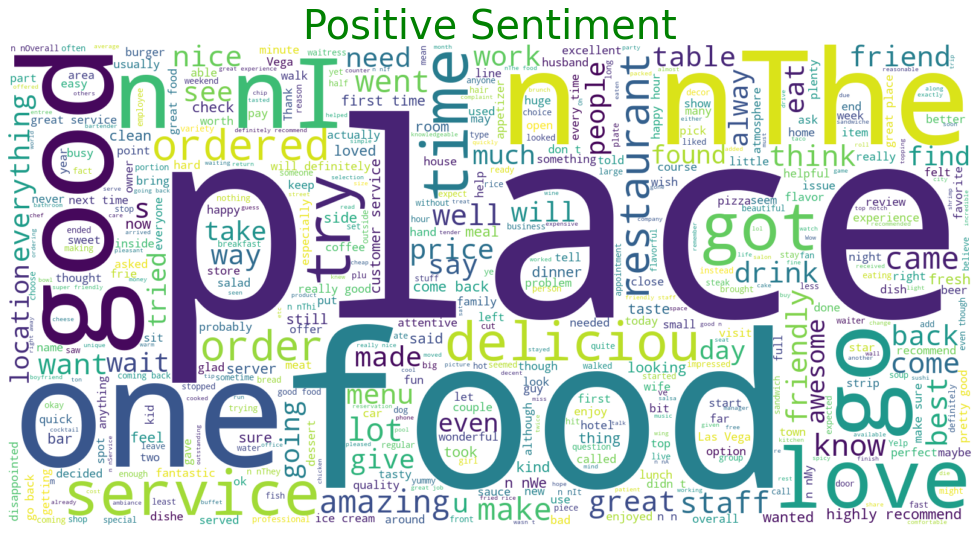

In [24]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(pos)))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Positive Sentiment", fontsize=40,color='Green')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

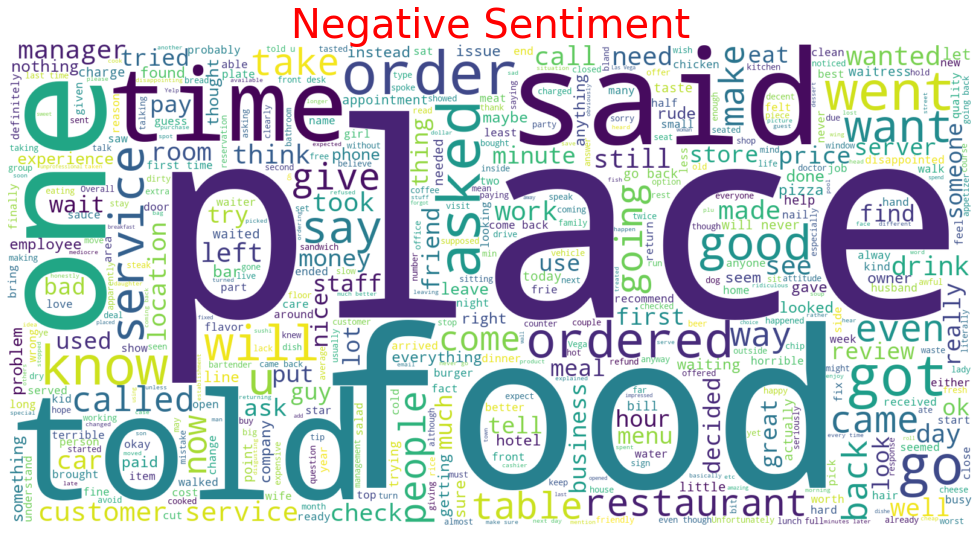

In [23]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
text_neg = " ".join(i for i in neg)
wordcloud.generate(text_neg)
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Negative Sentiment", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

#### No wonder place and food plays the most important role in both the postive and negative reviews :)

In [25]:
#Get the yelp business Parquet files produced by Synapse Analytics
dataset_yelp_business = Dataset.Tabular.from_parquet_files(path = [(datastore_yelp, \
'staging_parquet/yelp_businesss_parquet')])

dataset_yelp_business.register(workspace, 'yelp_business')

df_yelp_business = dataset_yelp_business.to_pandas_dataframe()

Credentials are not provided to access data from the source. Please sign in using identity with required permission granted.
Interactive sign-in timeout: 120 sec.
To change the sign-in tenant, restart the session with tenant ID set to environment variable "AZUREML_DATA_ACCESS_TENANT_ID" before sign in.
To always use device code for interactive sign-in, set environment variable "AZUREML_DATA_ACCESS_USE_DEVICE_CODE" to "true".
To configure timeout, set environment variable "AZUREML_DATA_ACCESS_INTERACT_TIMEOUT" to the number of seconds.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code ADAK2FZL7 to authenticate.


InteractiveBrowserCredential.get_token failed: Failed to open a browser


In [27]:
print(df_yelp_business.shape)
df_yelp_business.head()

(209393, 12)


,address,business_id,categories,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,10913 Bailey Rd,f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,1,35.462724,-80.852612,The Range At Lake Norman,28031,36,3.5,NC
1,"8880 E Via Linda, Ste 107",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,1,33.569404,-111.890264,"Carlos Santo, NMD",85258,4,5.0,AZ
2,3554 Rue Notre-Dame O,XNoUzKckATkOD1hP6vghZg,"Pets, Pet Services, Pet Groomers",Montreal,1,45.479984,-73.580070,Felinus,H4C 1P4,5,5.0,QC
3,1015 Sharp Cir,6OAZjbxqM5ol29BuHsil3w,"Hardware Stores, Home Services, Building Suppl...",North Las Vegas,0,36.219728,-115.127725,Nevada House of Hose,89030,3,2.5,NV
4,4827 E Downing Cir,51M2Kk903DFYI6gnB5I6SQ,"Home Services, Plumbing, Electricians, Handyma...",Mesa,1,33.428065,-111.726648,USE MY GUY SERVICES LLC,85205,26,4.5,AZ


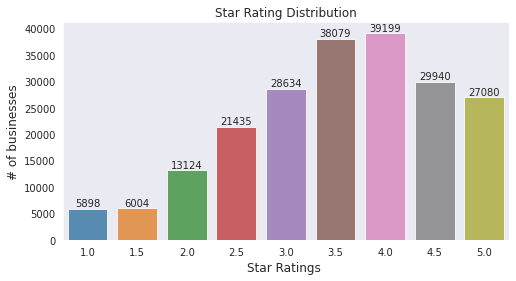

In [28]:
#Get the distribution of the ratings
x=df_yelp_business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

There are  2528  different types/categories of Businesses in Yelp!


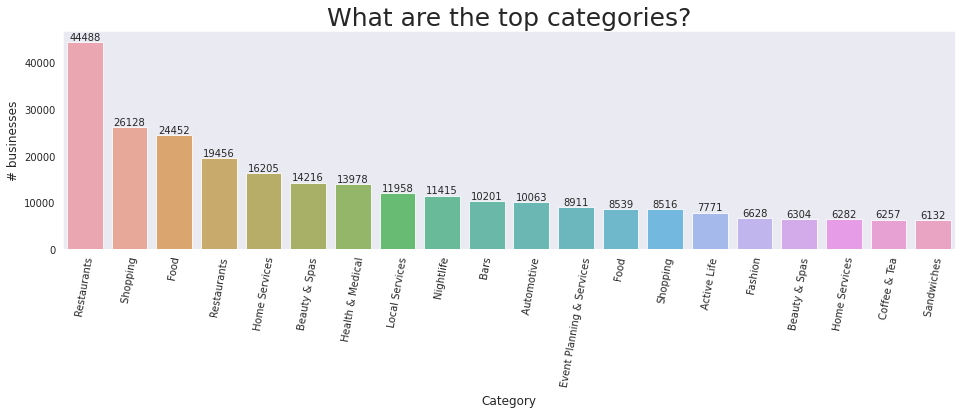

In [57]:
# Top 20 most popular business categories?
from pyspark.sql.functions import *
from pyspark.sql.types import *
#cats=df_yelp_business.select(explode(split(col("categories"), ",\s*")).alias("category")).toPandas()
cats['categories'] = df_yelp_business.assign(categories=df_yelp_business['categories'].str.split(',')).explode('categories')['categories']
x=cats.categories.value_counts()
print("There are ",len(x)," different types/categories of Businesses in Yelp!")


#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

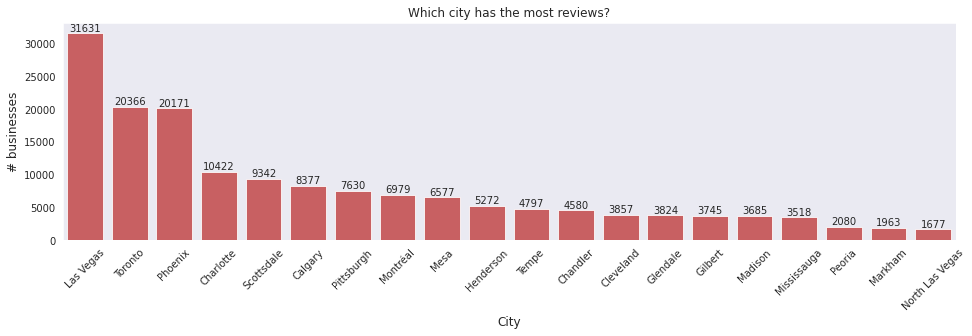

In [41]:
#Here, lets first check which cities have the most businesses reviewed by Yelp.

#Get the distribution of the ratings
x=df_yelp_business['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,color=color[3])
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [92]:
#Get the yelp business attributes Parquet files produced by Synapse Analytics
dataset_yelp_business_attributes = Dataset.Tabular.from_parquet_files(path = [(datastore_yelp, \
'staging_parquet/yelp_business_attributes_parquet')])

dataset_yelp_business_attributes.register(workspace, 'yelp_business_attributes')

df_yelp_business_attributes = dataset_yelp_business_attributes.to_pandas_dataframe()

Credentials are not provided to access data from the source. Please sign in using identity with required permission granted.
Interactive sign-in timeout: 120 sec.
To change the sign-in tenant, restart the session with tenant ID set to environment variable "AZUREML_DATA_ACCESS_TENANT_ID" before sign in.
To always use device code for interactive sign-in, set environment variable "AZUREML_DATA_ACCESS_USE_DEVICE_CODE" to "true".
To configure timeout, set environment variable "AZUREML_DATA_ACCESS_INTERACT_TIMEOUT" to the number of seconds.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code R33BXWPAH to authenticate.


InteractiveBrowserCredential.get_token failed: Failed to open a browser


In [93]:
print(df_yelp_business_attributes.shape)
df_yelp_business_attributes.head()

(209393, 44)


,business_id,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,...,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet
0,f9NumwFMBDn751xgFiRbNA,None,None,None,None,None,None,None,True,None,...,None,None,None,None,None,False,False,False,True,False
1,Yzvjg0SayhoZgCljUJRF9Q,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,XNoUzKckATkOD1hP6vghZg,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,6OAZjbxqM5ol29BuHsil3w,None,None,None,None,None,None,None,True,None,...,None,None,None,None,None,False,False,False,True,False
4,51M2Kk903DFYI6gnB5I6SQ,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [75]:
#Replacing all True/False to 1/0 in Business Attributes
cols_v = list(df_yelp_business_attributes.columns.values)[1:]

for i in range(len(cols_v)):
    print(cols_v[i])
    df_yelp_business_attributes[cols_v[i]].replace('Na', np.nan, inplace=True)
    df_yelp_business_attributes[cols_v[i]].replace('True', 1, inplace=True)
    df_yelp_business_attributes[cols_v[i]].replace('False', 0, inplace=True)
    df_yelp_business_attributes[cols_v[i]].replace('None', np.nan, inplace=True)

AcceptsInsurance
AgesAllowed
Alcohol
Ambience
BYOB
BYOBCorkage
BestNights
BikeParking
BusinessAcceptsBitcoin
BusinessAcceptsCreditCards
ByAppointmentOnly
Caters
CoatCheck
Corkage
DietaryRestrictions
DogsAllowed
DriveThru
GoodForDancing
GoodForKids
GoodForMeal
HairSpecializesIn
HappyHour
HasTV
Music
NoiseLevel
Open24Hours
OutdoorSeating
RestaurantsAttire
RestaurantsCounterService
RestaurantsDelivery
RestaurantsGoodForGroups
RestaurantsPriceRange2
RestaurantsReservations
RestaurantsTableService
RestaurantsTakeOut
Smoking
WheelchairAccessible
WiFi
BusinessParking_garage
BusinessParking_street
BusinessParking_validated
BusinessParking_lot
BusinessParking_valet


In [76]:
df_yelp_business_attributes.head()

,business_id,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,...,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet
0,f9NumwFMBDn751xgFiRbNA,NaN,None,None,None,NaN,None,None,1.0,NaN,...,NaN,NaN,None,NaN,None,False,False,False,True,False
1,Yzvjg0SayhoZgCljUJRF9Q,NaN,None,None,None,NaN,None,None,NaN,NaN,...,NaN,NaN,None,NaN,None,None,None,None,None,None
2,XNoUzKckATkOD1hP6vghZg,NaN,None,None,None,NaN,None,None,NaN,NaN,...,NaN,NaN,None,NaN,None,None,None,None,None,None
3,6OAZjbxqM5ol29BuHsil3w,NaN,None,None,None,NaN,None,None,1.0,NaN,...,NaN,NaN,None,NaN,None,False,False,False,True,False
4,51M2Kk903DFYI6gnB5I6SQ,NaN,None,None,None,NaN,None,None,NaN,NaN,...,NaN,NaN,None,NaN,None,None,None,None,None,None


In [77]:
# Business Ambience
ambiencelist = df_yelp_business_attributes.filter(like='Ambience').columns.tolist()
y = int(len(ambiencelist)/2)
fig, ax =plt.subplots(2, y, figsize=(8,6))
for i in range(2):
    for j in range(y):
        #print(i,j,ambiencelist[0])
        sns.countplot(df_yelp_business_attributes[ambiencelist[0]], ax=ax[i,j], palette="Set1")
        del ambiencelist[0]
fig.tight_layout() 

<Figure size 576x432 with 0 Axes>

In [70]:
bplist = df_yelp_business_attributes.filter(like='BusinessParking').columns.tolist()
bplist

['BusinessParking_garage',
 'BusinessParking_street',
 'BusinessParking_validated',
 'BusinessParking_lot',
 'BusinessParking_valet']

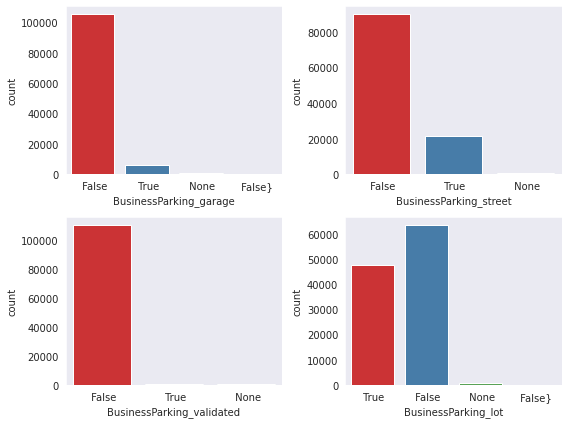

In [69]:
#Business Parking
bplist = df_yelp_business_attributes.filter(like='BusinessParking').columns.tolist()
y = int(len(bplist)/2)
fig, ax =plt.subplots(2, y, figsize=(8,6))
for i in range(2):
    for j in range(y):
        #print(i,j,ambiencelist[0])
        sns.countplot(x=df_yelp_business_attributes[bplist[0]], ax=ax[i,j], palette="Set1")
        del bplist[0]
fig.tight_layout() 

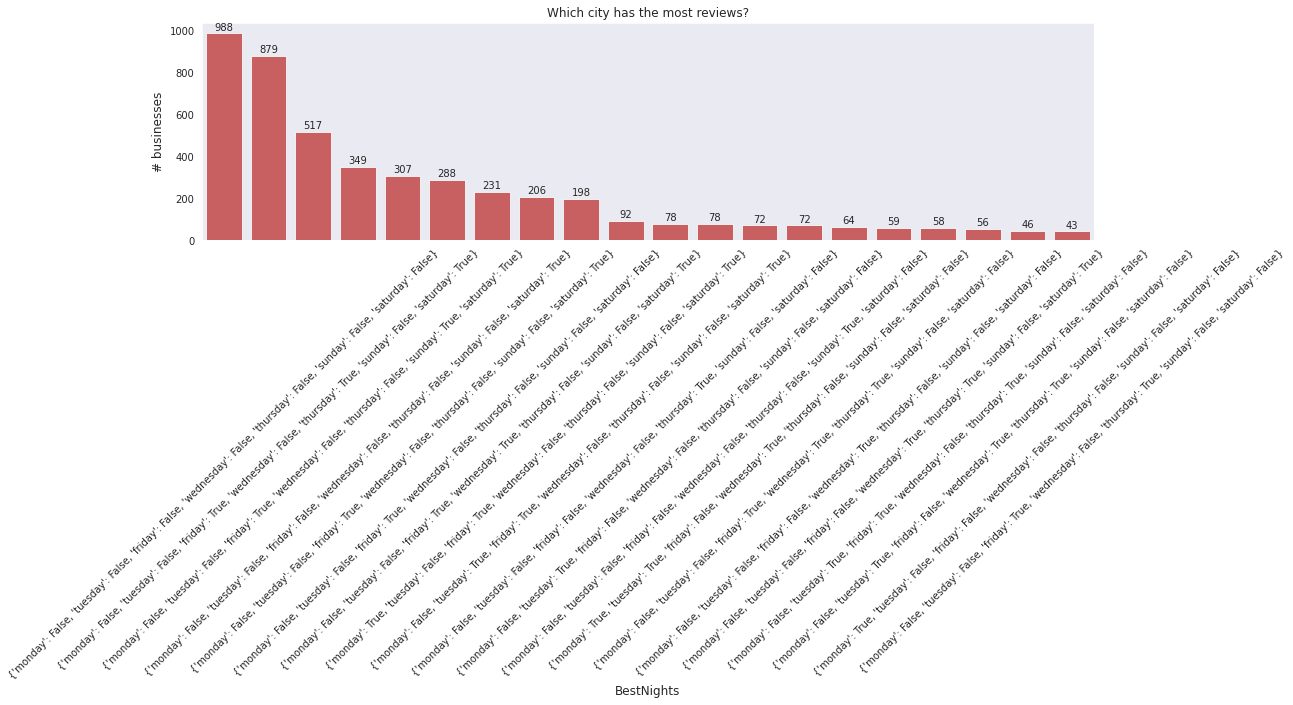

In [119]:
#Here, lets first check which cities have the most businesses reviewed by Yelp.

#Get the distribution of the ratings
x=df_yelp_business_attributes['BestNights'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,color=color[3])
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('BestNights', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

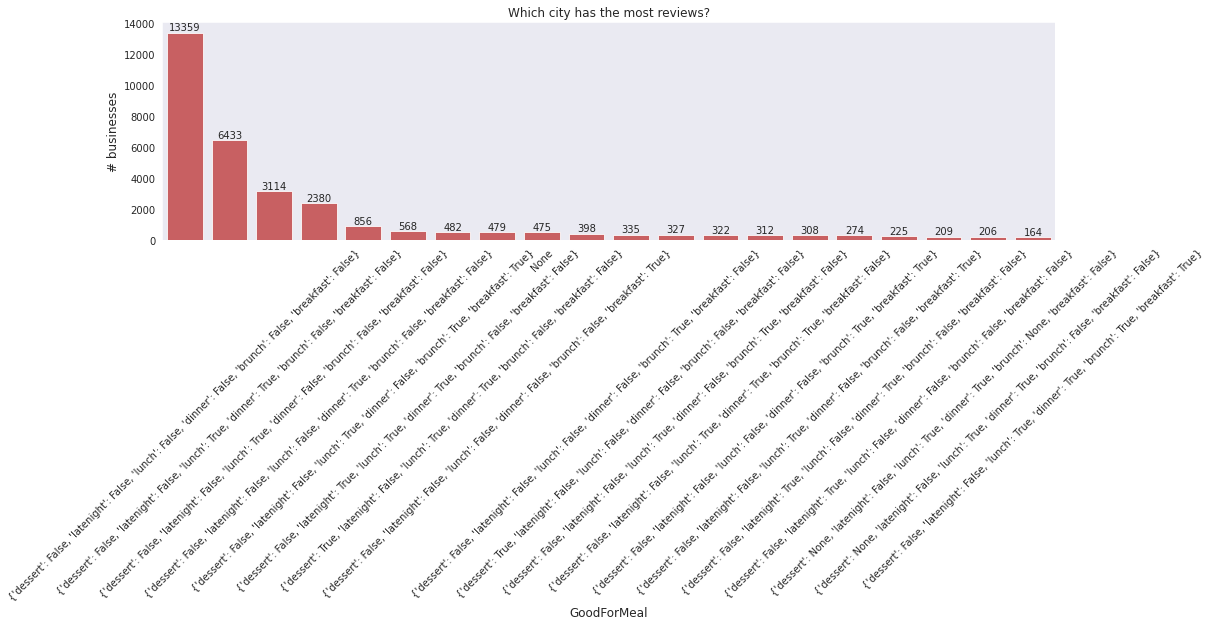

In [120]:
#Here, lets first check which cities have the most businesses reviewed by Yelp.

#Get the distribution of the ratings
x=df_yelp_business_attributes['GoodForMeal'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,color=color[3])
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('GoodForMeal', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [72]:
#Best Nights of the Business
bnlist = df_yelp_business_attributes.filter(like='BestNights').columns.tolist()
y = int(len(bnlist)/2)
fig, ax =plt.subplots(2, y, figsize=(8,6))
for i in range(2):
    for j in range(y):
        #print(i,j,ambiencelist[0])
        sns.countplot(x=df_yelp_business_attributes[bnlist[0]], ax=ax[i,j], palette="Set1")
        del bnlist[0]
fig.tight_layout()  

<Figure size 576x432 with 0 Axes>

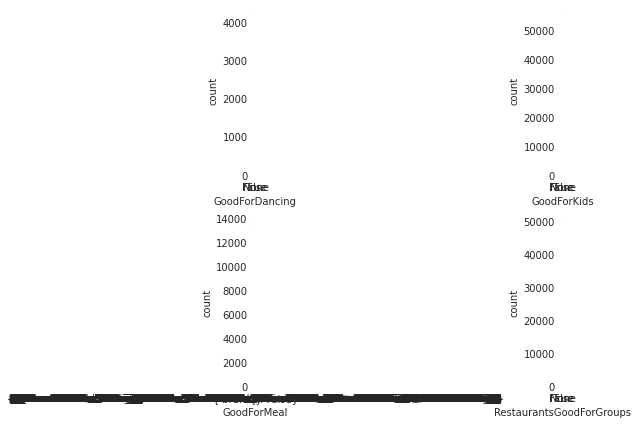

In [118]:
meallist = df_yelp_business_attributes.filter(like='GoodFor').columns.tolist()
y = int(len(meallist)/2)
fig, ax =plt.subplots(2, y, figsize=(8,6))
for i in range(2):
    for j in range(y):
        sns.countplot(x=df_yelp_business_attributes[meallist[0]], ax=ax[i,j], palette="Set1")
        del meallist[0]
fig.tight_layout() 

In [80]:
dtlist = df_yelp_business_attributes.filter(like='DietaryRestrictions').columns.tolist()
#del dtlist[0]
y = int(len(dtlist)/2)
fig, ax =plt.subplots(2, y, figsize=(8,6))
for i in range(2):
    for j in range(y):
        sns.countplot(df_yelp_business_attributes[dtlist[0]], ax=ax[i,j], palette="Set1")
        del dtlist[0]
fig.tight_layout()     

<Figure size 576x432 with 0 Axes>

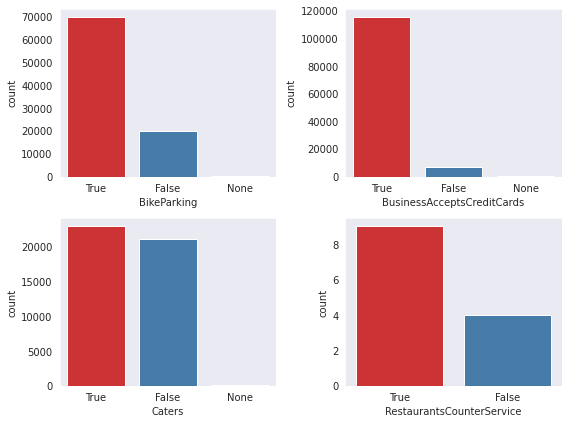

In [102]:
alist = ['BikeParking', 
          'BusinessAcceptsCreditCards', 'Caters',
          'RestaurantsCounterService']

fig, ax =plt.subplots(2, 2, figsize=(8,6))
for i in range(2):
    for j in range(2):
        sns.countplot(x=df_yelp_business_attributes[alist[0]], ax=ax[i,j], palette="Set1")
        del alist[0]
fig.tight_layout()      

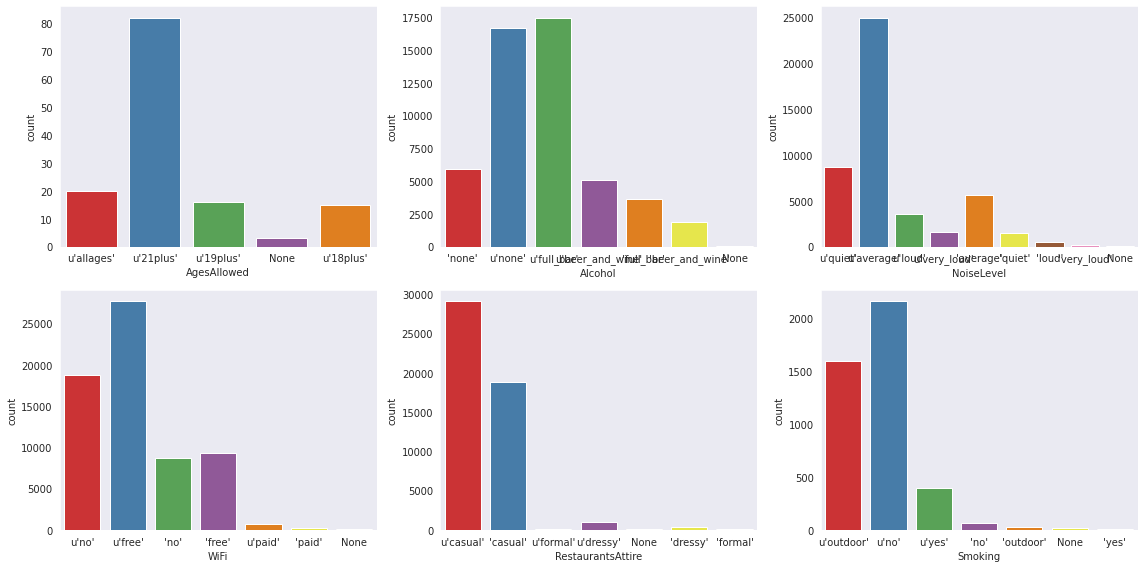

In [96]:
alist00 = ['AgesAllowed', 'Alcohol', 'NoiseLevel', 'WiFi','RestaurantsAttire', 'Smoking']

fig, ax =plt.subplots(2, 3, figsize=(16,8))
for i in range(2):
    for j in range(3):
        sns.countplot(x=df_yelp_business_attributes[alist00[0]], ax=ax[i,j], palette="Set1")
        del alist00[0]
fig.tight_layout() 

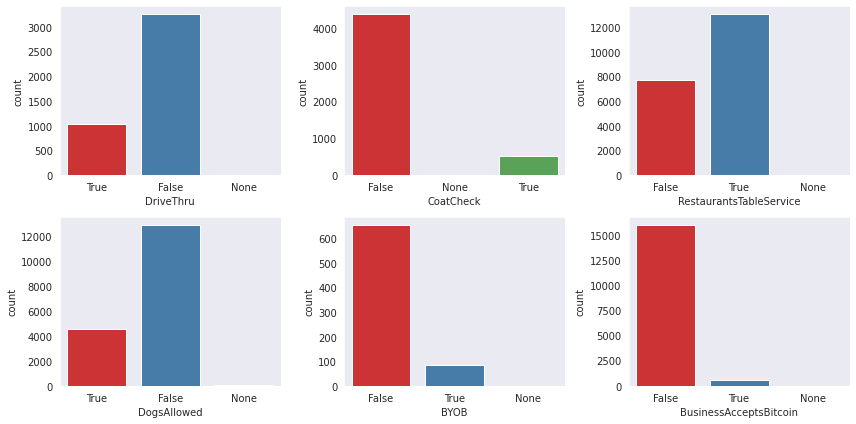

In [117]:
alist1 = [ 'DriveThru', 'CoatCheck', 'RestaurantsTableService','DogsAllowed', 
          'BYOB', 'BusinessAcceptsBitcoin']


fig, ax =plt.subplots(2, 3, figsize=(12,6))
for i in range(2):
    for j in range(3):
        sns.countplot(x=df_yelp_business_attributes[alist1[0]], ax=ax[i,j], palette="Set1")
        del alist1[0]
fig.tight_layout()      

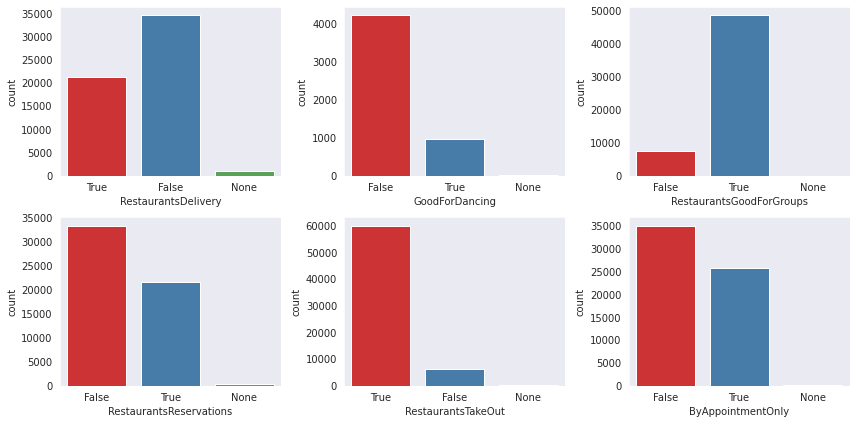

In [113]:
alist2 = [ 'RestaurantsDelivery','GoodForDancing',
          'RestaurantsGoodForGroups', 'RestaurantsReservations', 
           'RestaurantsTakeOut', 'ByAppointmentOnly']

fig, ax =plt.subplots(2, 3, figsize=(12,6))
for i in range(2):
    for j in range(3):
        sns.countplot(x=df_yelp_business_attributes[alist2[0]], ax=ax[i,j], palette="Set1")
        del alist2[0]
fig.tight_layout()   

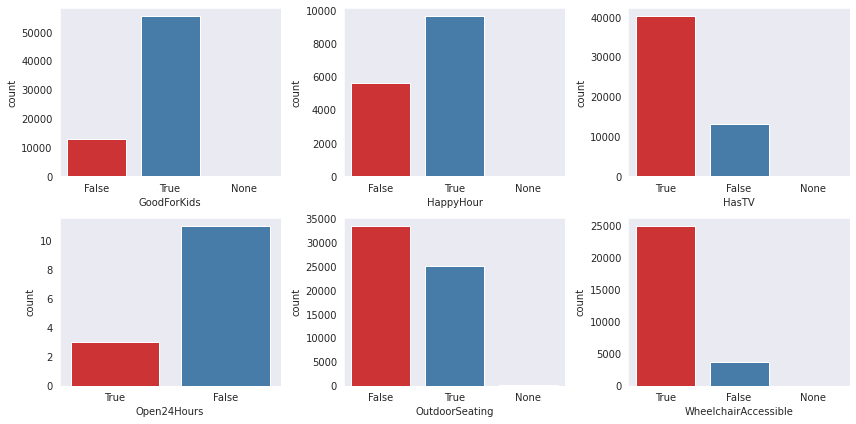

In [112]:
alist3 = ['GoodForKids', 'HappyHour', 'HasTV', 
          'Open24Hours', 'OutdoorSeating', 'WheelchairAccessible']


fig, ax =plt.subplots(2, 3, figsize=(12,6))
for i in range(2):
    for j in range(3):
        sns.countplot(x=df_yelp_business_attributes[alist3[0]], ax=ax[i,j], palette="Set1")
        del alist3[0]
fig.tight_layout()   

In [82]:
# What businesss has got more reviews ?
df_yelp_business.name.value_counts().index[:20].tolist()



['Starbucks',
 "McDonald's",
 'Subway Restaurants',
 'Tim Hortons',
 'Burger King',
 'Taco Bell',
 'Pizza Hut',
 "Wendy's",
 'Walgreens',
 'The UPS Store',
 'Circle K',
 'CVS Pharmacy',
 'Great Clips',
 'Subway',
 'Enterprise Rent-A-Car',
 "Domino's Pizza",
 "Dunkin'",
 'KFC',
 '7-Eleven',
 'Wells Fargo Bank']

In [83]:
biz_cnt = pd.DataFrame(df_yelp_business['name'].value_counts()[:20])

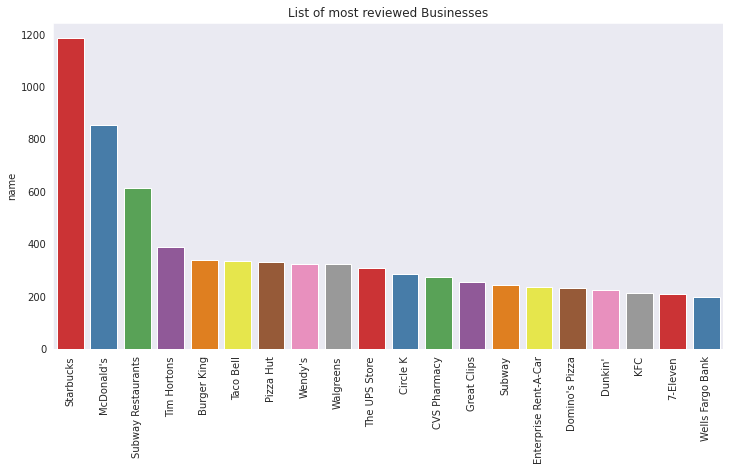

In [84]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=biz_cnt.index, y=biz_cnt['name'], palette = 'Set1')
plt.title('List of most reviewed Businesses');
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

In [85]:
#Which user reviewed the most?
aggregations = {
    'review_id' : 'count',
    'cool':'sum',
    'funny':'sum',
    'useful':'sum',    
    'stars_review': 'mean'
}

In [89]:
#The user who has given most reviews
user_top10 = df_yelp_review.groupby(['user_id'], as_index=False).agg(aggregations).sort_values(by='review_id', ascending=False)
user_top10.head(3)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


KeyError: 'stars_review'

In [121]:
city_cnt = pd.DataFrame(df_yelp_business['city'].value_counts()[:20])
state_cnt = pd.DataFrame(df_yelp_business['state'].value_counts()[:20])

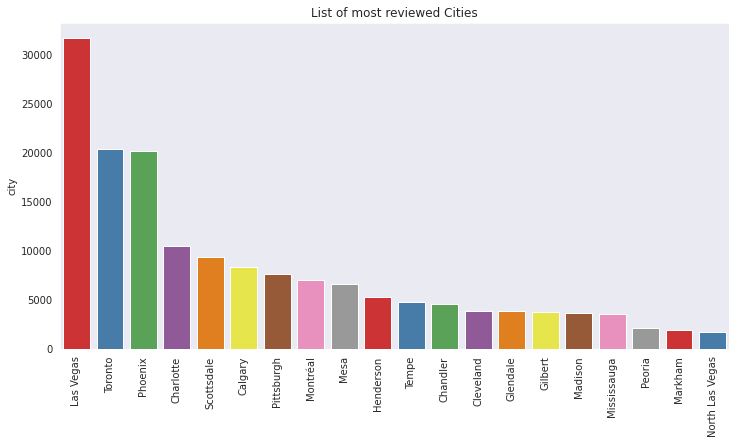

In [122]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=city_cnt.index, y=city_cnt['city'], palette = 'Set1')
plt.title('List of most reviewed Cities');
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

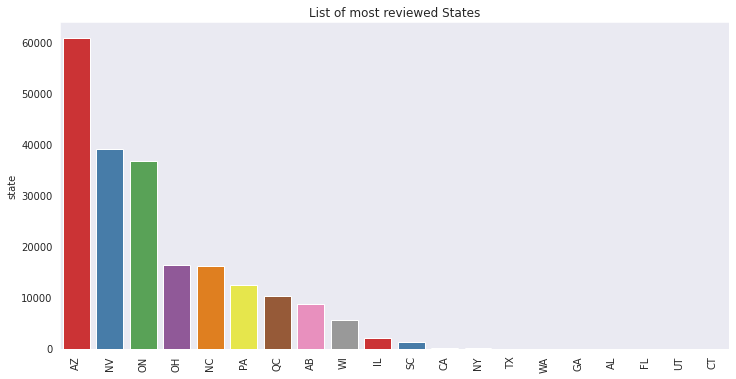

In [123]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=state_cnt.index, y=state_cnt['state'], palette = 'Set1')
plt.title('List of most reviewed States');
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()